In [85]:
from numpy.random import randint 
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import csv
from scipy.stats import truncnorm

## Parameters

In [86]:
# parameters

modelPath = ""
modelName = "NNMedian.keras"

n_arrays = 10_000
array_length = 50
max_digit = 1000
epochs = 50
batch_size = 32
neurons = 2
n_layers = 2
stop_perc = 5

In [87]:
# calculate number of permutation 
#print("number of permutation: ", max_digit**array_length)
#print("percentage of view:", (n_arrays * 0.5) * 100 / max_digit**array_length, "%")

## Dataset

In [88]:
# generate input and output data
# give different max value 

input_arrays = []
label_arrays = []
for _ in range(n_arrays):
    temp_array = randint(0, randint(max_digit // 2, max_digit), array_length)
    temp_label = np.sort(temp_array)
    
    input_arrays.append(temp_array)
    label_arrays.append(temp_label)

In [89]:
def get_truncated_normal(mean, sd, low, upp):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

input_val_arrays = []
label_val_arrays = []
for _ in range(round(0.25 * n_arrays)):
    rand_max = randint(round(max_digit / 2), max_digit)
    rand_mean = round((1 + rand_max) / 2)
    X = get_truncated_normal(rand_mean, sd=110, low=1, upp=rand_max)

    temp_array = X.rvs(array_length)
    temp_label = np.sort(temp_array)
    
    input_val_arrays.append(temp_array)
    label_val_arrays.append(temp_label)

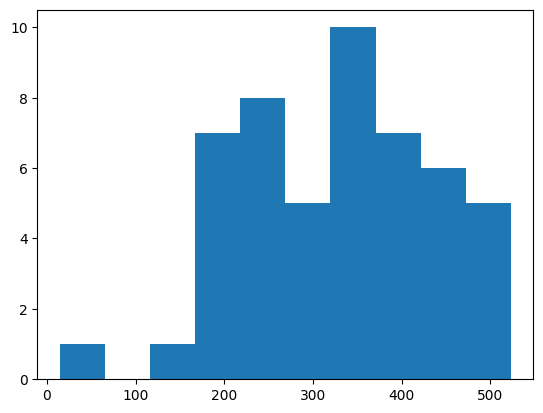

In [90]:
plt.hist(input_val_arrays[0])
plt.show()

In [91]:
print(len(input_arrays), len(label_arrays))
print(input_arrays[:3])
print(label_arrays[:3])

10000 10000
[array([735, 902, 557, 849, 214, 598, 278, 272, 347, 582, 788, 444, 839,
       126, 786, 908, 403, 135, 558, 393, 403, 316, 370, 273, 107,  11,
       887, 860, 865, 164, 516, 123, 810, 101, 591, 850, 856, 630, 580,
       706, 228, 559, 140, 485, 854, 385, 485,  70, 356, 978]), array([444, 590,  15, 583, 428, 404, 523, 557, 129, 503, 198, 570, 414,
       109, 234, 178, 152,  87,  13, 132, 443, 391, 626, 463, 633, 581,
       329, 379, 522, 622, 318,  21, 369, 288, 389, 428,  77, 153, 403,
       492, 579, 513, 205, 466, 539, 313, 591, 565, 270,  84]), array([117, 455, 535, 324, 447,  12,  49, 117, 210, 149, 219, 224, 519,
       395, 120, 263, 250,  93, 312,  35, 532, 459, 166, 390, 290, 448,
       484, 160, 317, 124, 147, 231, 463,  40, 216, 220, 444, 242, 412,
       300, 233,  58, 130, 340, 470, 139, 529, 554, 117, 231])]
[array([ 11,  70, 101, 107, 123, 126, 135, 140, 164, 214, 228, 272, 273,
       278, 316, 347, 356, 370, 385, 393, 403, 403, 444, 485, 485, 516,
  

In [92]:
# normalize 

for i in range(len(input_arrays)):
    input_arrays[i] = input_arrays[i].astype("float32") / (max_digit - 1)
    label_arrays[i] = label_arrays[i].astype("float32") / (max_digit - 1)
for i in range(len(input_val_arrays)):
    input_val_arrays[i] = input_val_arrays[i].astype("float32") / (max_digit - 1)
    label_val_arrays[i] = label_val_arrays[i].astype("float32") / (max_digit - 1)

In [93]:
# make np array 

input_arrays = np.array(input_arrays)
label_arrays = np.array(label_arrays)

input_val_arrays = np.array(input_val_arrays)
label_val_arrays = np.array(label_val_arrays)

In [94]:
print(input_arrays[:1])
print(label_arrays[:1])

print(input_val_arrays[:1])
print(label_val_arrays[:1])

[[0.7357357  0.9029029  0.5575576  0.8498498  0.21421422 0.5985986
  0.2782783  0.27227226 0.34734735 0.5825826  0.7887888  0.44444445
  0.8398398  0.12612613 0.7867868  0.9089089  0.4034034  0.13513513
  0.5585586  0.3933934  0.4034034  0.3163163  0.37037036 0.27327326
  0.10710711 0.01101101 0.8878879  0.8608609  0.8658659  0.16416417
  0.5165165  0.12312312 0.8108108  0.1011011  0.5915916  0.8508509
  0.8568569  0.6306306  0.5805806  0.7067067  0.22822823 0.5595596
  0.14014015 0.4854855  0.8548549  0.3853854  0.4854855  0.07007007
  0.35635635 0.978979  ]]
[[0.01101101 0.07007007 0.1011011  0.10710711 0.12312312 0.12612613
  0.13513513 0.14014015 0.16416417 0.21421422 0.22822823 0.27227226
  0.27327326 0.2782783  0.3163163  0.34734735 0.35635635 0.37037036
  0.3853854  0.3933934  0.4034034  0.4034034  0.44444445 0.4854855
  0.4854855  0.5165165  0.5575576  0.5585586  0.5595596  0.5805806
  0.5825826  0.5915916  0.5985986  0.6306306  0.7067067  0.7357357
  0.7867868  0.7887888  0.81

In [95]:
# split data 

data_test = input_arrays
data_validation = input_val_arrays

label_test = label_arrays
label_validation = label_val_arrays


In [96]:
print(data_test.shape, data_validation.shape)
print(label_test.shape, label_validation.shape)

(10000, 50) (2500, 50)
(10000, 50) (2500, 50)


## Model

In [97]:
inputs = keras.Input(shape=(array_length))
x = layers.Dense(neurons, activation="relu") (inputs)
x = layers.Dense(neurons, activation="relu") (x)
outputs = layers.Dense(array_length, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 50)                150       
                                                                 
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [99]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
        filepath=modelPath + modelName, 
        monitor="val_mae", 
        save_best_only=True),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=int(epochs/100*stop_perc))
    ]   

In [100]:
history = model.fit(
    data_test, 
    label_test, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(data_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/50
313/313 [==============================] - 5s 5ms/step - loss: 0.6240 - mae: 0.1511 - val_loss: 0.6810 - val_mae: 0.1200
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 0.5571 - mae: 0.0760 - val_loss: 0.6855 - val_mae: 0.1142
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.5522 - mae: 0.0670 - val_loss: 0.6826 - val_mae: 0.1109


## Performance

In [101]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

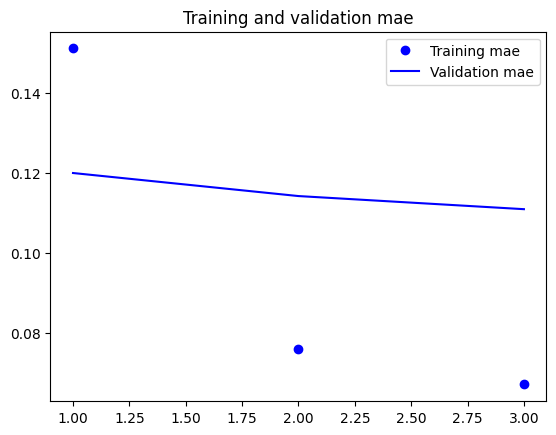

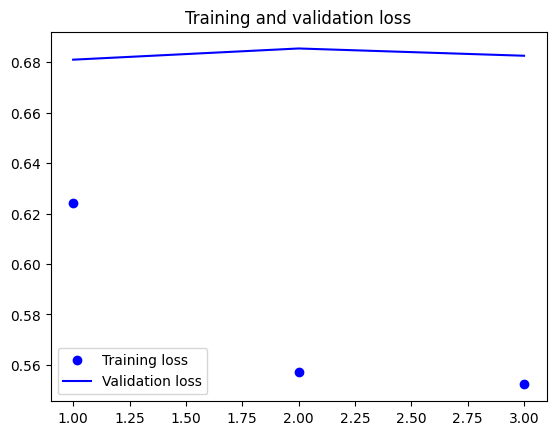

In [102]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation mae")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [103]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(data_validation, label_validation)
eval_mae_perc = eval_mae * (max_digit - 1)

print(f"Evaluation accuracy: {eval_mae:.3f}")
print(f"Evaluation mae denormalized: {eval_mae_perc:.2f}")

79/79 [==============================] - 0s 3ms/step - loss: 0.6826 - mae: 0.1109
Evaluation accuracy: 0.111
Evaluation mae denormalized: 110.79


In [104]:
def denormalize(x):
    x = x * (max_digit - 1)
    return x

def rounding(x):
    x = round(x, 0)
    return x

predictions = model_best.predict(data_validation)
targets = label_validation

79/79 [==============================] - 0s 2ms/step


In [105]:
# denormalize and round 

predictions_denorm = []
targets_denorm = []
for i in range(len(predictions)):
    temp_pred_denorm_array = []
    temp_targ_denorm_array = []
    for ii in range(array_length):
        temp_pred_denorm_array.append(rounding(denormalize(float(predictions[i][ii]))))
        temp_targ_denorm_array.append(rounding(denormalize(targets[i][ii])))
    predictions_denorm.append(temp_pred_denorm_array)
    targets_denorm.append(temp_targ_denorm_array)

print(len(predictions_denorm), len(targets_denorm))
print(predictions_denorm[:3])
print(targets_denorm[:3])

2500 2500
[[21.0, 41.0, 61.0, 78.0, 94.0, 110.0, 124.0, 146.0, 157.0, 166.0, 184.0, 188.0, 209.0, 233.0, 244.0, 257.0, 258.0, 278.0, 282.0, 311.0, 314.0, 325.0, 353.0, 360.0, 368.0, 365.0, 378.0, 418.0, 407.0, 425.0, 442.0, 465.0, 454.0, 486.0, 488.0, 511.0, 519.0, 536.0, 559.0, 564.0, 578.0, 601.0, 611.0, 626.0, 639.0, 656.0, 668.0, 687.0, 704.0, 718.0], [23.0, 48.0, 70.0, 87.0, 104.0, 116.0, 129.0, 158.0, 166.0, 168.0, 191.0, 185.0, 214.0, 245.0, 250.0, 261.0, 255.0, 279.0, 276.0, 312.0, 312.0, 319.0, 358.0, 361.0, 361.0, 348.0, 361.0, 416.0, 393.0, 415.0, 436.0, 458.0, 432.0, 475.0, 470.0, 495.0, 503.0, 520.0, 552.0, 547.0, 558.0, 590.0, 593.0, 605.0, 617.0, 634.0, 645.0, 668.0, 687.0, 697.0], [8.0, 18.0, 28.0, 40.0, 53.0, 71.0, 89.0, 93.0, 113.0, 138.0, 146.0, 174.0, 180.0, 183.0, 205.0, 222.0, 252.0, 261.0, 290.0, 290.0, 315.0, 335.0, 332.0, 356.0, 383.0, 418.0, 435.0, 418.0, 461.0, 469.0, 480.0, 492.0, 540.0, 530.0, 565.0, 573.0, 595.0, 611.0, 615.0, 650.0, 669.0, 672.0, 699.0, 7

In [106]:
# plot the prediction and target by merging all the arrays 

index_x = 0
x_merged = []
pred_merged = []
targ_merged = []
for i in range(len(predictions_denorm)):
    for ii in range(array_length):
        index_x += 1
        x_merged.append(index_x)
        pred_merged.append(predictions_denorm[i][ii])
        targ_merged.append(targets_denorm[i][ii])

In [107]:
# calculate error that are elements out of place 

miss = 0
hit = 0
tot = len(pred_merged)
for i in range(len(pred_merged)):
    if (pred_merged[i] == targ_merged[i]):
        hit += 1
    else:
        miss += 1
perc = round(hit * 100 / tot, 1)

print(f"tot: {tot}, hit: {hit}, miss: {miss}, perc hit: {perc}%")

tot: 125000, hit: 284, miss: 124716, perc hit: 0.2%


In [108]:
# calculate mean absolute error 
# need to calculate the maximum for every array as they are different 

def mean_absolute_error_array(pre_denorm, tar_denorm):
    N = len(pre_denorm)
    errors_array = []
    for i in range(N):
        temp_error = 0
        temp_sum = 0
        n = array_length
        for ii in range(n):
            temp_sum += abs(pre_denorm[i][ii] - tar_denorm[i][ii])
        temp_error = temp_sum / n
        errors_array.append(temp_error)
    return errors_array

def mean_absolute_error(mae_array):
    return np.mean(mae_array)

def mean_absolute_error_perc(mae_array, tar_denorm):
    # calcualte the max value 
    # take the target for the maximum 
    max_val_array = []
    for i in range(len(tar_denorm)):
        max_val_array.append(np.max(tar_denorm[i]))
    
    mae_perc_array = []
    for i in range(len(tar_denorm)):
        if max_val_array[i] != 0:
            mae_perc_array.append(mae_array[i] * 100 / max_val_array[i])
        else:
            mae_perc_array.append(mae_array[i] * 100)
    
    mae_perc = np.mean(mae_perc_array)
    
    return max_val_array, mae_perc_array, mae_perc

mae_array = mean_absolute_error_array(predictions_denorm, targets_denorm)
mae = mean_absolute_error(mae_array)
max_val_array, mae_perc_array, mae_perc = mean_absolute_error_perc(mae_array, targets_denorm)
mae_perc = round(mae_perc, 1)

# print(predictions_denorm[:3])
# print(targets_denorm[:3])
print(f"mean absolute error of every array: {mae_array[:3]}")
print(f"max value of every array: {max_val_array[:3]}")
print(f"mae perc of every array: {mae_perc_array[:3]}")
print()
print(f"mean absolute error: {mae}")
print(f"mean absolute error perc: {mae_perc}%")

mean absolute error of every array: [85.86, 97.36, 135.14]
max value of every array: [523.0, 462.0, 649.0]
mae perc of every array: [16.41682600382409, 21.073593073593074, 20.822804314329737]

mean absolute error: 110.789576
mean absolute error perc: 18.1%


In [109]:
print("array_length: ", array_length)
print(len(pred_merged), len(targ_merged))
print(pred_merged[:(2*array_length)])
print(targ_merged[:(2*array_length)])

array_length:  50
125000 125000
[21.0, 41.0, 61.0, 78.0, 94.0, 110.0, 124.0, 146.0, 157.0, 166.0, 184.0, 188.0, 209.0, 233.0, 244.0, 257.0, 258.0, 278.0, 282.0, 311.0, 314.0, 325.0, 353.0, 360.0, 368.0, 365.0, 378.0, 418.0, 407.0, 425.0, 442.0, 465.0, 454.0, 486.0, 488.0, 511.0, 519.0, 536.0, 559.0, 564.0, 578.0, 601.0, 611.0, 626.0, 639.0, 656.0, 668.0, 687.0, 704.0, 718.0, 23.0, 48.0, 70.0, 87.0, 104.0, 116.0, 129.0, 158.0, 166.0, 168.0, 191.0, 185.0, 214.0, 245.0, 250.0, 261.0, 255.0, 279.0, 276.0, 312.0, 312.0, 319.0, 358.0, 361.0, 361.0, 348.0, 361.0, 416.0, 393.0, 415.0, 436.0, 458.0, 432.0, 475.0, 470.0, 495.0, 503.0, 520.0, 552.0, 547.0, 558.0, 590.0, 593.0, 605.0, 617.0, 634.0, 645.0, 668.0, 687.0, 697.0]
[15.0, 157.0, 172.0, 174.0, 194.0, 205.0, 210.0, 214.0, 215.0, 220.0, 227.0, 235.0, 248.0, 250.0, 252.0, 264.0, 267.0, 271.0, 281.0, 288.0, 291.0, 305.0, 322.0, 326.0, 333.0, 336.0, 338.0, 346.0, 349.0, 350.0, 353.0, 356.0, 371.0, 376.0, 377.0, 380.0, 399.0, 412.0, 417.0, 423

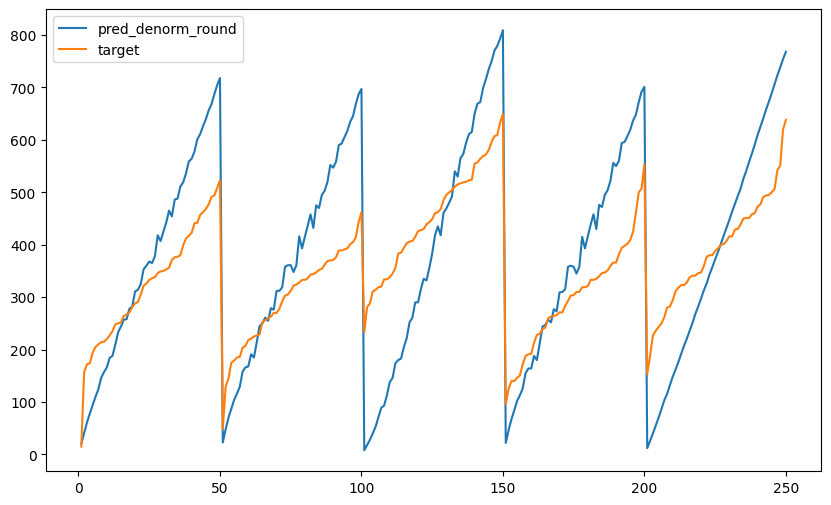

In [110]:
plot_length = array_length * 5

plt.figure(figsize=(10, 6))
plt.plot(x_merged[:plot_length], pred_merged[:plot_length], label="pred_denorm_round")
plt.plot(x_merged[:plot_length], targ_merged[:plot_length], label="target")
plt.legend(loc="upper left")
plt.show()

## Custom Prediction

In [111]:
def pred_norm(xs):
    xs = xs.astype("float32") / (max_digit - 1)
    return xs

def pred_denorm(xs):
    xs = xs * (max_digit - 1)
    return xs

def pred_round(xs):
    for i in range(len(xs)):
        xs[i] = round(xs[i], 0)
    return xs

In [112]:
xs = [4, 2, 6, 9]
# xs = randint(0, randint(max_digit // 2, max_digit), array_length)

p_array = np.array([np.array(xs)])
p_array_sorted = np.sort(p_array)

# normalize before input 
predictions = model_best.predict(pred_norm(p_array))

opt_predictions = pred_round(pred_denorm(predictions[0]))

print(f"input: {p_array}")
print(f"target sorted: {p_array_sorted}")
print(f"prediction raw: {predictions}")
print(f"prediction opt: {opt_predictions}")

InvalidArgumentError: Graph execution error:

Detected at node 'model_3/dense_9/Relu' defined at (most recent call last):
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/4h/b9kx8pbj3cnccv7pss_lhq9w0000gn/T/ipykernel_18929/1513570447.py", line 8, in <module>
      predictions = model_best.predict(pred_norm(p_array))
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/Users/pietrocasavecchia/.pyenv/versions/3.10.7/lib/python3.10/site-packages/keras/backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_3/dense_9/Relu'
Matrix size-incompatible: In[0]: [1,4], In[1]: [50,2]
	 [[{{node model_3/dense_9/Relu}}]] [Op:__inference_predict_function_61361]

## Net Weights Biases

In [ ]:
w1 = model_best.layers[1].get_weights()[0].tolist()
b1  = model_best.layers[1].get_weights()[1].tolist()
w2 = model_best.layers[2].get_weights()[0].tolist()
b2  = model_best.layers[2].get_weights()[1].tolist()
w3 = model_best.layers[3].get_weights()[0].tolist()
b3 = model_best.layers[3].get_weights()[1].tolist()

print(w1)
print(b1)
print()
print(w2)
print(b2)
print()
print(w3)
print(b3)

[[0.8150220513343811, 0.7541196942329407], [1.2166539430618286, -0.13240580260753632], [1.2582141160964966, -0.21784424781799316], [0.7916389107704163, 0.8247056007385254]]
[-0.3621383607387543, 0.2091396600008011]

[[1.2288165092468262, -0.3462147116661072], [0.545619547367096, -1.1531530618667603]]
[-0.3630017638206482, 0.0]

[[0.9505090713500977, 1.0523734092712402, 0.9362964034080505, 0.7824893593788147], [0.1099095344543457, 0.6303865909576416, 0.7679321765899658, 0.6771161556243896]]
[-3.3563690185546875, -2.4431111812591553, -1.5501933097839355, -0.6827306747436523]


In [ ]:
# build header

def build_header_element(L_n, n_neurons):
    weight = "w" + str(L_n) + "_" + str(n_neurons)
    bias = "b" + str(L_n) + "_" + str(n_neurons)
    return weight, bias

def add_to_header(net, L_n, n_neurons):
    weight, bias = build_header_element(L_n, n_neurons)
    net.append(weight)
    net.append(bias)

# write data 
def add_data(header, max_column, *parameters):

    net_list = []

    for i in range(len(parameters)):
        temp_list = []
        for ii in range(len(parameters[i])):
            if type(parameters[i][ii]) is list:
                for iii in range(len(parameters[i][ii])): 
                    temp_list.append(parameters[i][ii][iii])
            else:
                temp_list.append(parameters[i][ii])
        net_list.append(temp_list)
    
    # print(header)
    # print(net_list)
    
    with open("net_weight_bias.csv", 'w') as f:
        writer = csv.writer(f)
        # header 
        writer.writerow(header)
        # parameters
        for i in range(max_column):
            row = []
            for ii in range(len(header)):
                try:
                    row.append(net_list[ii][i])
                except:
                    row.append("")
            writer.writerow(row)

In [ ]:
# add to csv

net_header = []
neurons = [2, 2, 4]
max_column = 2 * 4

add_to_header(net_header, 1, neurons[0])
add_to_header(net_header, 2, neurons[1])
add_to_header(net_header, 3, neurons[2])

add_data(
    net_header,
    max_column,
    w1, b1,
    w2, b2,
    w3, b3,
)